In [34]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
import gymnasium as gym
from tqdm import tqdm
import matplotlib.pyplot as plt

from rl_hockey.sac import SAC

In [36]:
# env_name = 'Pendulum-v1'
env_name = 'LunarLanderContinuous-v3'

In [37]:
env = gym.make(env_name)
env = gym.wrappers.RescaleAction(env, min_action=-1.0, max_action=1.0)

o_space = env.observation_space
ac_space = env.action_space

c:\Users\Jannik\anaconda3\envs\rl-hockey\lib\site-packages\gymnasium\spaces\box.py:236: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
c:\Users\Jannik\anaconda3\envs\rl-hockey\lib\site-packages\gymnasium\spaces\box.py:306: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


In [38]:
agent = SAC(o_space.shape[0], action_dim=ac_space.shape[0])

In [39]:
max_episodes = 30
max_steps = 500

critic_losses = []
actor_losses = []
rewards = []

pbar = tqdm(range(max_episodes))
for i in pbar:    
    total_reward = 0
    state, _ = env.reset()
    for t in range(max_steps):
        done = False
        action = agent.act(state)
        (next_state, reward, done, trunc, _) = env.step(action)
        total_reward += reward
        agent.store_transition((state, action, reward, next_state, done))            
        state = next_state

        stats = agent.train()
        critic_losses.extend(stats['critic_loss'])
        actor_losses.extend(stats['actor_loss'])

        if done or trunc:
            break

    rewards.append(total_reward)    
    
    pbar.set_postfix({
        'total_reward': total_reward
    })

100%|██████████| 30/30 [05:19<00:00, 10.65s/it, total_reward=-12.1]


In [40]:
def moving_average(data, window_size):
    return [sum(data[max(0, i - window_size + 1):i + 1]) / (min(i + 1, window_size)) for i in range(len(data))]

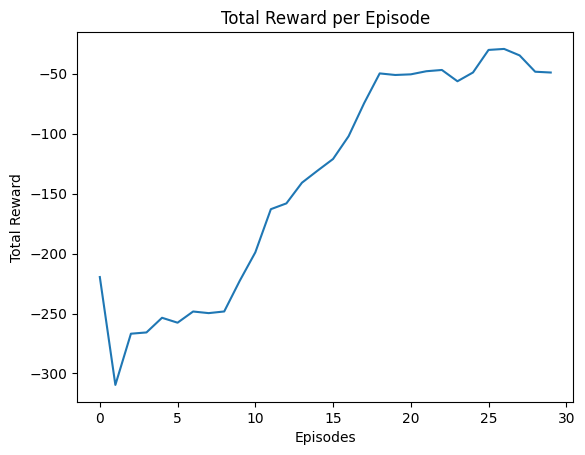

In [41]:
plt.plot(moving_average(rewards, 10))
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.show()

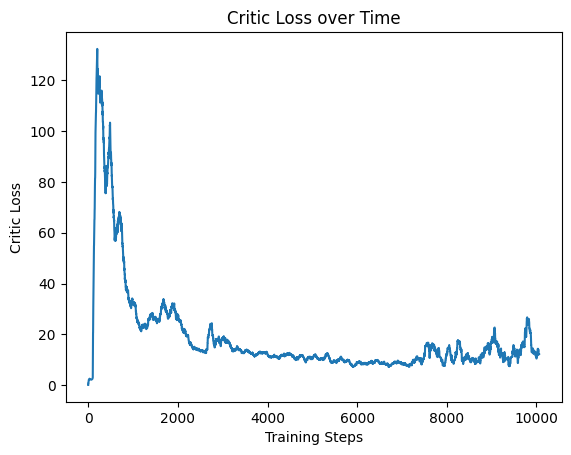

In [42]:
plt.plot(moving_average(critic_losses, 100))
plt.xlabel('Training Steps')
plt.ylabel('Critic Loss')
plt.title('Critic Loss over Time')
plt.show()

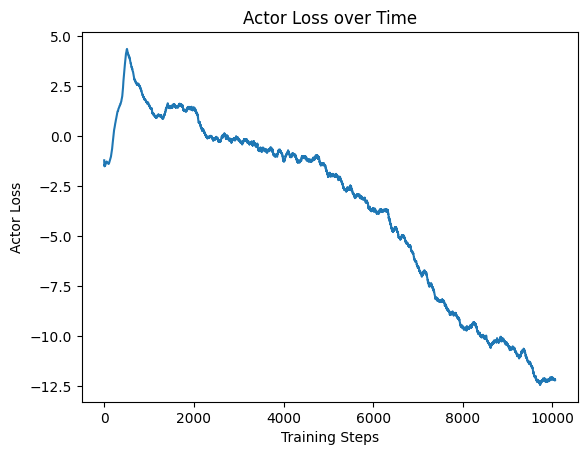

In [43]:
plt.plot(moving_average(actor_losses, 100))
plt.xlabel('Training Steps')
plt.ylabel('Actor Loss')
plt.title('Actor Loss over Time')
plt.show()

In [48]:
env = gym.make(env_name, render_mode='human')
env = gym.wrappers.RescaleAction(env, min_action=-1.0, max_action=1.0)

state, _ = env.reset()
for t in range(1000):
    done = False
    action = agent.act(state, deterministic=True)
    (next_state, reward, done, trunc, _) = env.step(action)
    state = next_state

    if done or trunc:
        break

env.close()